In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pickle

In [2]:
class Layer:
    def __init__(self):
        self.inputs = None
        self.outputs = None

    def forward(self):
        raise NotImplementedError("Forward method not implemented! Somethings Fishy !")

    def backward(self):
        raise NotImplementedError("Backward method not implemented! Somethings Fishy !")


In [3]:
class txt6312_Linear(Layer):
    
    def __init__(self, num_input_neurons, num_output_neurons):
        super().__init__()
        self.num_input_neurons = num_input_neurons
        self.num_output_neurons = num_output_neurons
        self.weights = None
        self.bias = None
        self.initialize_parameters()

    def initialize_parameters(self):
        self.weights = np.random.randn(self.num_output_neurons, self.num_input_neurons)
        self.bias = np.random.randn(self.num_output_neurons)

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.weights.T) + self.bias
        return self.Z
    
    def backward(self, upstream_grad_in, learning_rate):
        grad_weights = np.dot(upstream_grad_in.T, self.X)
        grad_bias = np.sum(upstream_grad_in, axis=0)
        grad_inputs = np.dot(upstream_grad_in, self.weights)

        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias

        return grad_inputs


In [4]:
class txt6312_Sigmoid(Layer):
    
    def __init__(self):
        super().__init__()

    def forward(self, A):
        self.A = A
        self.B = self._sigmoid(A)
        return self.B

    def backward(self, C, lr):
        D = self._sigmoid_derivative(self.B)
        E = C * D
        return E

    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def _sigmoid_derivative(self, X):
        return X * (1 - X)


In [5]:
class txt6312_TanH(Layer):
    
    def __init__(self):
        super().__init__()

    def forward(self, X):
        self.A = X
        self.B = self._tanh(X)
        return self.B

    def backward(self, C, lr):
        self.D = self._tanh_derivative(self.B)
        self.E = C * self.D
        return self.E

    def _tanh(self, X):
        return np.tanh(X)

    def _tanh_derivative(self, X):
        return 1 - np.power(X, 2)


In [6]:
class txt6312_Softmax(Layer):
    
    def __init__(self):
        super().__init__()

    def forward(self, X):
        self.A = X
        self.B = self._softmax(X)
        return self.B

    def backward(self, C, lr):
        self.D = C
        return self.D

    def _softmax(self, X):
        exp_values = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)


In [7]:
class txt6312_CrossEntropyLoss(Layer):
    
    def __init__(self):
        super().__init__()

    def forward(self, A, B):
        self.inputs = B
        self.actual_A = A
        self.outputs = self._calculate_loss(A, B)
        return self.outputs

    def backward(self, P, Q):
        R = self._calculate_local_gradient()
        X = P * R
        return X

    def _calculate_loss(self, A, B):
        epsilon = 1e-15
        B = np.clip(B, epsilon, 1 - epsilon)
        loss_occured = -np.sum(A * np.log(B))
        return loss_occured

    def _calculate_local_gradient(self):
        epsilon = 1e-15
        B = np.clip(self.inputs, epsilon, 1 - epsilon)
        R = self.inputs - self.actual_A
        return R

In [8]:
class txt6312_Sequential(Layer):
  
  def __init__(self):
      super().__init__()
      self.layers = []
      self.loss = None
      self.loss_in_array = []
      self.error_Validation = []

  def add_data_to_Layers(self, layer):
      self.layers.append(layer) 

  def usage_of_loss(self, loss_func):
    self.loss = loss_func 

  def fit(self, A, B, C_val=None, D_val=None, E=10, F=0.01):
    self.F = F 
    G = 0 
    H = float('inf') 
    I = A.shape[0] 
    J = C_val.shape[0] if C_val is not None else 0 
    for K in range(E): 
        L = 0 
  
        for M in range(I): 
            N = A[M] 
            if (N.ndim == 1):
              N = N[None, :] 

            for O in self.layers:
                N = O.forward(N)

            
            L += self.loss.forward(B[M], N)

            P = np.array(self.loss.backward(1, F)) 
            
            for Q in reversed(self.layers): 
                P = Q.backward(P, F)
        L = L / I 
        self.loss_in_array.append(round(L, 6)) 
        if C_val is not None and D_val is not None: 
            R = 0
            for S in range(J):
                T = C_val[S]
                if (T.ndim == 1):
                    T = T[None, :]

                for U in self.layers:
                    T = U.forward(T)

                R += np.sum(np.mean(self.loss.forward(D_val[S], T)))

            R = R / J 
            self.error_Validation.append(R)

            if R < H: 
                H = R
                G = 0
            else:
                G += 1 

        if G >= 5: 
            print(f"Stopping early after epoch {K+1} due to no improvement in validation loss.")
            break
        

        print(f"Epoch No. : {K+1} --- training loss: {L:.6f} --- validation loss: {R:.6f}" if C_val is not None and D_val is not None else f"Epoch No. : {K+1} --- training loss: {L:.6f}")

  def predict(self, A): 
    I = A.shape[0]
    V = []
    W = []
    for X in range(I):
      Y = A[X]

      for Z in self.layers:
          Y = Z.forward(Y)
      V.append(Y)


    for Y in V:
      Y[Y > 0.5] = 1
      Y[Y < 0.5] = 0
    for Y in V:
      W.append(np.argmax(Y, axis=0))
    print(W)
    return np.array(V)


  def plot(self): 
    plt.figure(figsize=(21, 9))
    plt.plot(self.loss_in_array, label='Training Loss') 
    plt.plot(self.error_Validation, label='Validation Loss') 

    plt.title(f"txt6312_Loss VS txt6312_Epoch Comparison {self.F}", fontsize=18)
    plt.xlabel("txt6312_Loss", fontsize=18)
    plt.ylabel("txt6312_Epoch", fontsize=18)
    plt.legend()


In [9]:
samples = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([[0], [1], [1], [0]])

In [10]:
txt6312_network1 = txt6312_Sequential()
txt6312_network1.add_data_to_Layers(txt6312_Linear(2,2))
txt6312_network1.add_data_to_Layers(txt6312_Sigmoid())
txt6312_network1.add_data_to_Layers(txt6312_Linear(2,1))
txt6312_network1.add_data_to_Layers(txt6312_Sigmoid())
txt6312_network1.usage_of_loss(txt6312_CrossEntropyLoss())


In [11]:
txt6312_network1.fit(samples,targets,None,None,100,0.001)

Epoch No. : 1 --- training loss: 0.167761
Epoch No. : 2 --- training loss: 0.167808
Epoch No. : 3 --- training loss: 0.167855
Epoch No. : 4 --- training loss: 0.167901
Epoch No. : 5 --- training loss: 0.167948
Epoch No. : 6 --- training loss: 0.167995
Epoch No. : 7 --- training loss: 0.168041
Epoch No. : 8 --- training loss: 0.168088
Epoch No. : 9 --- training loss: 0.168134
Epoch No. : 10 --- training loss: 0.168181
Epoch No. : 11 --- training loss: 0.168228
Epoch No. : 12 --- training loss: 0.168274
Epoch No. : 13 --- training loss: 0.168321
Epoch No. : 14 --- training loss: 0.168368
Epoch No. : 15 --- training loss: 0.168414
Epoch No. : 16 --- training loss: 0.168461
Epoch No. : 17 --- training loss: 0.168508
Epoch No. : 18 --- training loss: 0.168554
Epoch No. : 19 --- training loss: 0.168601
Epoch No. : 20 --- training loss: 0.168648
Epoch No. : 21 --- training loss: 0.168694
Epoch No. : 22 --- training loss: 0.168741
Epoch No. : 23 --- training loss: 0.168788
Epoch No. : 24 --- t

In [12]:
with open('XOR_solved.w', 'wb') as p_file:
    pickle.dump(txt6312_network1, p_file, pickle.HIGHEST_PROTOCOL)

In [13]:
txt6312_network1.predict(samples)

[0, 0, 0, 0]


array([[1.],
       [1.],
       [1.],
       [1.]])

In [14]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28*28)
X_train = X_train.astype(np.float64)
X_train /= 255
X_train = X_train.squeeze()
X_test = X_test.reshape(X_test.shape[0],1,28*28)
X_test = X_test.astype(np.float64).squeeze()
X_test /= 255

In [15]:
def get_one_hot(targets, nb_classes): 
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)] 
    return res.reshape(list(targets.shape)+[nb_classes])

In [16]:
y_train =  get_one_hot(y_train.astype(int), 10)
y_test = get_one_hot(y_test.astype(int), 10)

In [17]:
train_ratio = 0.9
train_size = int(train_ratio * X_train.shape[0])
X_Val = X_train[train_size:]
Y_Val = y_train[train_size:]
X_train = X_train[:train_size]
y_train = y_train[:train_size]


Results_&_Graph_For_Model1

In [18]:
txt6312_model_1 = txt6312_Sequential()
txt6312_model_1.add_data_to_Layers(txt6312_Linear(28*28,64))
txt6312_model_1.add_data_to_Layers(txt6312_Sigmoid())
txt6312_model_1.add_data_to_Layers(txt6312_Linear(64,10))
txt6312_model_1.add_data_to_Layers(txt6312_Sigmoid())
txt6312_model_1.usage_of_loss(txt6312_CrossEntropyLoss())
txt6312_model_1.fit(X_train,y_train,X_Val,Y_Val,10,0.001)

Epoch No. : 1 --- training loss: 5.329975 --- validation loss: 7.129259
Epoch No. : 2 --- training loss: 7.310232 --- validation loss: 7.340856
Epoch No. : 3 --- training loss: 7.399328 --- validation loss: 7.364151
Epoch No. : 4 --- training loss: 7.396679 --- validation loss: 7.317039
Epoch No. : 5 --- training loss: 7.324463 --- validation loss: 7.205833
Epoch No. : 6 --- training loss: 7.195482 --- validation loss: 7.046899
Epoch No. : 7 --- training loss: 7.029393 --- validation loss: 6.854237
Epoch No. : 8 --- training loss: 6.819753 --- validation loss: 6.592973
Epoch No. : 9 --- training loss: 6.531631 --- validation loss: 6.268997
Epoch No. : 10 --- training loss: 6.265604 --- validation loss: 6.050638


In [19]:
predicted = txt6312_model_1.predict(X_test)

[7, 3, 1, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 3, 7, 1, 0, 1, 1, 7, 4, 0, 0, 0, 3, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 1, 0, 6, 7, 0, 0, 0, 0, 0, 0, 4, 3, 0, 7, 0, 0, 0, 1, 7, 3, 7, 0, 7, 0, 0, 0, 7, 0, 0, 7, 3, 0, 0, 0, 0, 0, 3, 1, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7, 2, 1, 7, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 7, 0, 0, 7, 0, 0, 0, 7, 0, 7, 0, 3, 0, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 7, 0, 3, 0, 0, 0, 0, 0, 7, 7, 3, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 

In [20]:
with open('MNIST_Model1.w', 'wb') as p_file:
    pickle.dump(txt6312_model_1, p_file, pickle.HIGHEST_PROTOCOL)

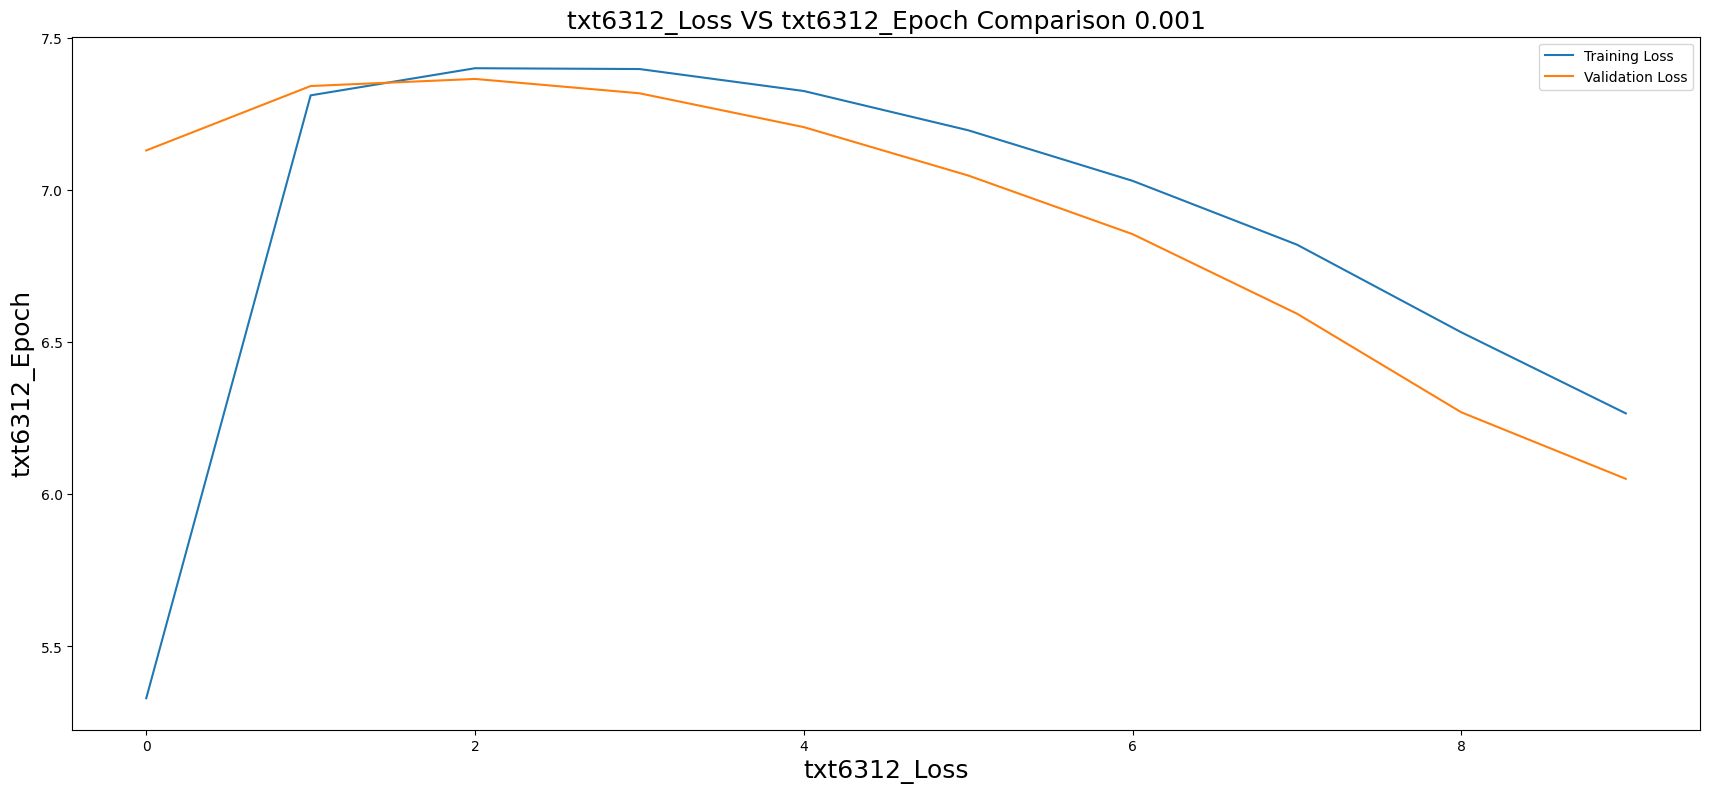

In [21]:
txt6312_model_1.plot()

Results_&_Graph_For_Model2

In [22]:
txt6312_model_2 = txt6312_Sequential()
txt6312_model_2.add_data_to_Layers(txt6312_Linear(28*28,64))
txt6312_model_2.add_data_to_Layers(txt6312_TanH())
txt6312_model_2.add_data_to_Layers(txt6312_Linear(64,10))
txt6312_model_2.add_data_to_Layers(txt6312_Sigmoid())
txt6312_model_2.usage_of_loss(txt6312_CrossEntropyLoss())
txt6312_model_2.fit(X_train,y_train,X_Val,Y_Val,10,0.001)

Epoch No. : 1 --- training loss: 9.767046 --- validation loss: 12.186775
Epoch No. : 2 --- training loss: 12.561915 --- validation loss: 13.132708
Epoch No. : 3 --- training loss: 13.135167 --- validation loss: 13.472444
Epoch No. : 4 --- training loss: 13.355487 --- validation loss: 13.582354
Epoch No. : 5 --- training loss: 13.416440 --- validation loss: 13.571439
Stopping early after epoch 6 due to no improvement in validation loss.


In [23]:
predicted = txt6312_model_2.predict(X_test)

[0, 3, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 5, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 0, 4, 0, 0, 4, 4, 3, 4, 4, 1, 0, 4, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

In [24]:
with open('MNIST_Model2.w', 'wb') as p_file:
    pickle.dump(txt6312_model_2, p_file, pickle.HIGHEST_PROTOCOL)

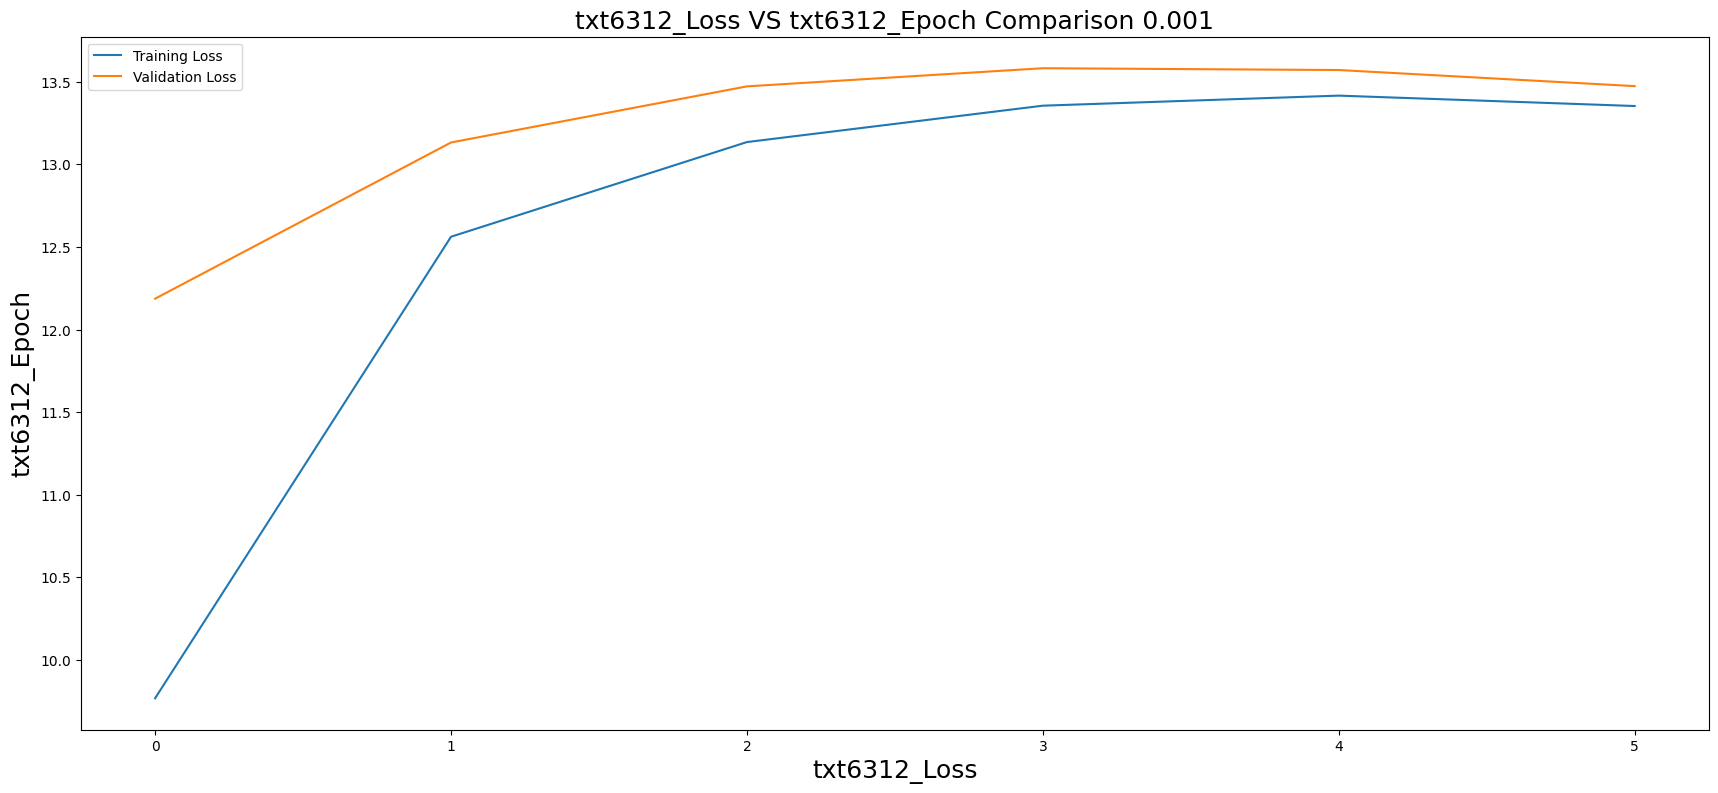

In [25]:
txt6312_model_2.plot()

Results_&_Graph_For_Model3

In [26]:
txt6312_model_3 = txt6312_Sequential()
txt6312_model_3.add_data_to_Layers(txt6312_Linear(28*28,64))
txt6312_model_3.add_data_to_Layers(txt6312_TanH())
txt6312_model_3.add_data_to_Layers(txt6312_Linear(64,10))
txt6312_model_3.add_data_to_Layers(txt6312_Sigmoid())
txt6312_model_3.usage_of_loss(txt6312_CrossEntropyLoss())
txt6312_model_3.fit(X_train,y_train,X_Val,Y_Val,10,0.001)

Epoch No. : 1 --- training loss: 8.033540 --- validation loss: 10.869876
Epoch No. : 2 --- training loss: 11.682850 --- validation loss: 12.044965
Epoch No. : 3 --- training loss: 12.424978 --- validation loss: 12.460535
Epoch No. : 4 --- training loss: 12.669181 --- validation loss: 12.531752
Epoch No. : 5 --- training loss: 12.620484 --- validation loss: 12.344772
Stopping early after epoch 6 due to no improvement in validation loss.


In [27]:
predicted = txt6312_model_3.predict(X_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
with open('MNIST_Model3.w', 'wb') as p_file:
    pickle.dump(txt6312_model_3, p_file, pickle.HIGHEST_PROTOCOL)

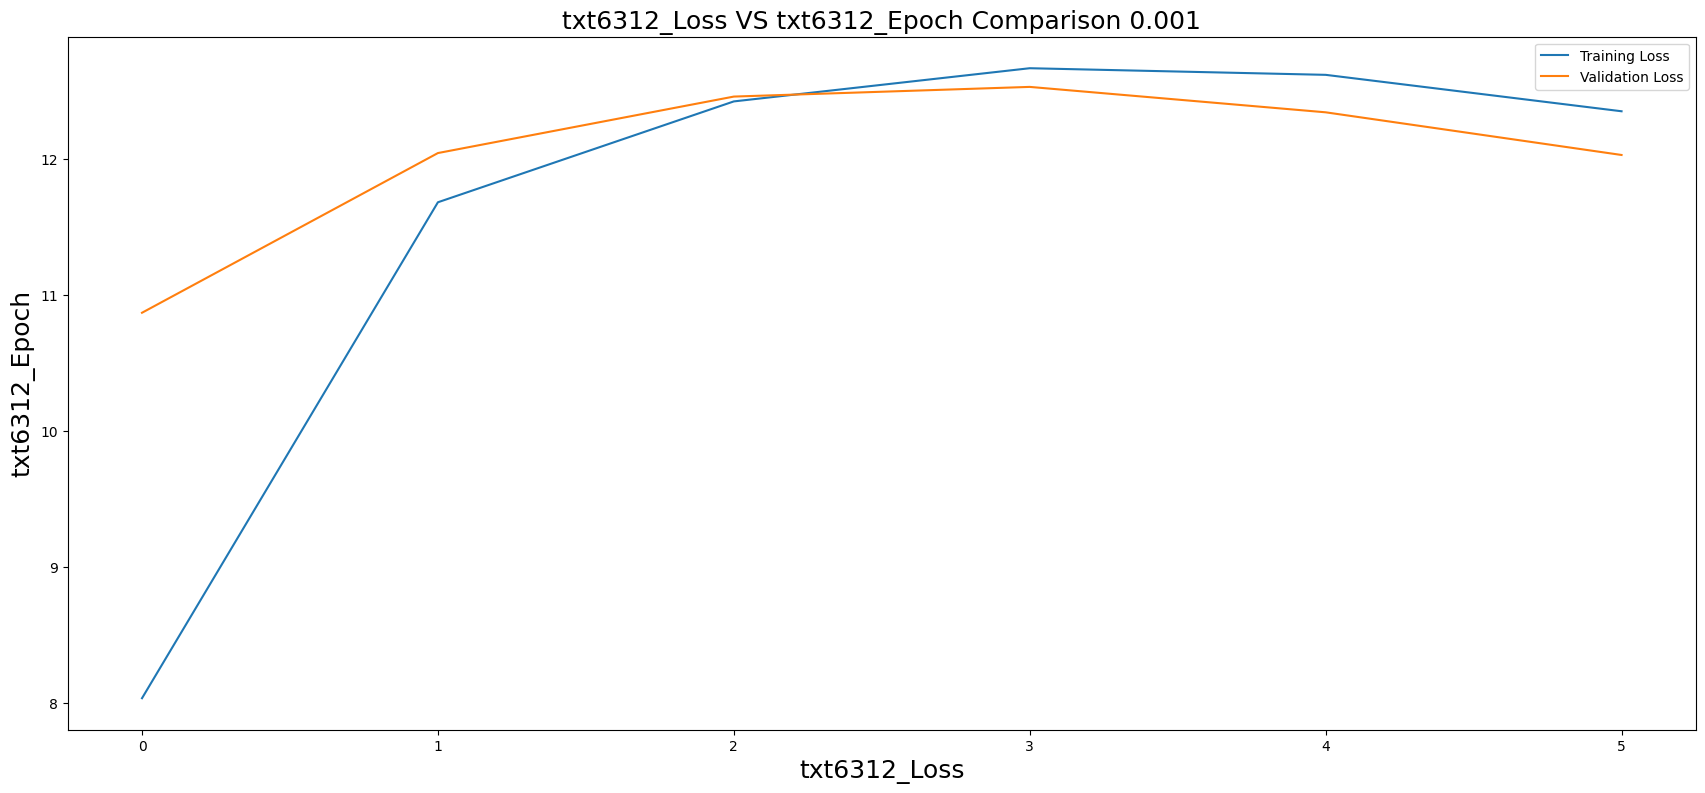

In [29]:
txt6312_model_3.plot()